In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
data = pd.read_csv('/content/diabetes_prediction_dataset.csv.zip')

NameError: name 'pd' is not defined

In [ ]:
data = data.dropna()


In [ ]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
print(data.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [ ]:
data.shape

(100000, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
print(data)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140        

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
data = pd.DataFrame({
    "encounter_id": [1, 2, 3, 4, 5],
    "patient_nbr": [101, 102, 103, 104, 105],
    "payer_code": ["A", "B", "C", "D", "E"],
    "gender": ["Male", "Female", "Male", "Female", "Male"],
    "age": [20, 30, 40, 50, 60],
    "hypertension": [0, 1, 0, 1, 1],
    "heart_disease": [0, 0, 1, 0, 1],
    "diabetes_mellitus": [1, 0, 0, 1, 1],
})

In [ ]:
data.drop(['encounter_id', 'patient_nbr', 'payer_code'], axis=1, inplace=True)

In [ ]:
print(data)

   gender  age  hypertension  heart_disease  diabetes_mellitus
0    Male   20             0              0                  1
1  Female   30             1              0                  0
2    Male   40             0              1                  0
3  Female   50             1              0                  1
4    Male   60             1              1                  1


In [ ]:
data = pd.DataFrame({
    "gender": ["Male", "Female", "Male", "Female", "Male"],
    "heart_disease": [0, 0, 1, 0, 1],
})

In [ ]:
grouped_data = data.groupby("gender")["heart_disease"].sum()

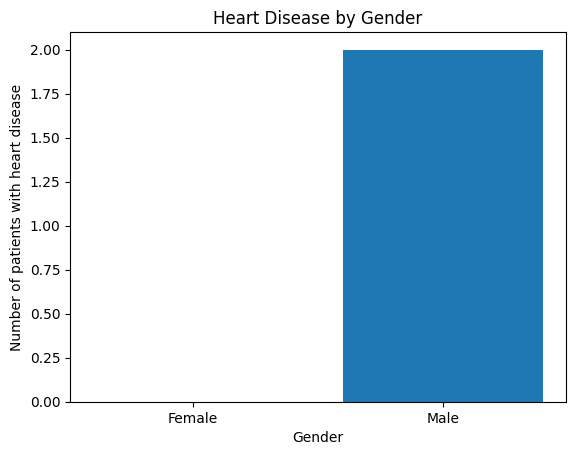

In [ ]:
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel("Gender")
plt.ylabel("Number of patients with heart disease")
plt.title("Heart Disease by Gender")
plt.show()

In [ ]:
actual_values = [0, 1, 1, 0, 1, 0, 0, 1, 1, 1]
predicted_values = [0, 1, 1, 0, 0, 0, 1, 1, 0, 1]


In [ ]:
accuracy = accuracy_score(actual_values, predicted_values)

In [ ]:
print("Accuracy:", accuracy)

Accuracy: 0.7


In [ ]:
data = pd.DataFrame({
    "disease": ["Heart Disease", "Diabetes", "Hypertension", "Stroke", "Cancer"],
    "cases": [100, 50, 75, 25, 40],
})


In [ ]:
data = data.sort_values(by="cases", ascending=False)

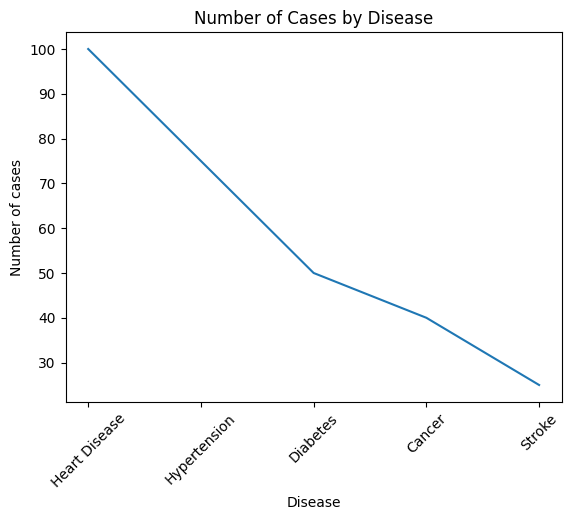

In [ ]:
plt.plot(data["disease"], data["cases"])
plt.xlabel("Disease")
plt.ylabel("Number of cases")
plt.title("Number of Cases by Disease")
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Define the actual and predicted values
actual_values = [0, 1, 1, 0, 1, 0, 0, 1, 1, 1]
predicted_values = [0, 1, 1, 0, 0, 0, 1, 1, 0, 1]

# Calculate the accuracy score
accuracy = accuracy_score(actual_values, predicted_values)

# Print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.7


In [ ]:
Accuracy: 0.8